# Lab 2: Mine Crafting

Erika Falco ~ March 28th, 2025

In [102]:
# Constants
G = 6.6743 * 10**-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
M_earth = 5.972 * 10**24 #kg
M_moon = 7.35 * 10**22 #kg
R_earth = 6378.1 * 10**3 #m
D_earth = 2* R_earth #m
w_earth = 7.272 * 10**-5 #rad/s -- rotation rate of earth about equator

In [103]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Part 1: The Ideal Case

In [104]:
# How long would a test mass take to reach the bottom of a 4 km shaft, assuming no drag?
gamma = 2 
alpha = 0

def time_to_fall(h):
    return np.sqrt(2*h/g0)

t_fall = time_to_fall(4*10**3)
print(f"It takes {t_fall} seconds to fall")

It takes 28.55686245854129 seconds to fall


It hits the bottom at t = [28.55686246] seconds


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 4.000e+03  4.000e+03 ...  3.590e+01  7.934e+00]
            [ 0.000e+00 -9.820e-01 ... -2.789e+02 -2.799e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 1.819e-12, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


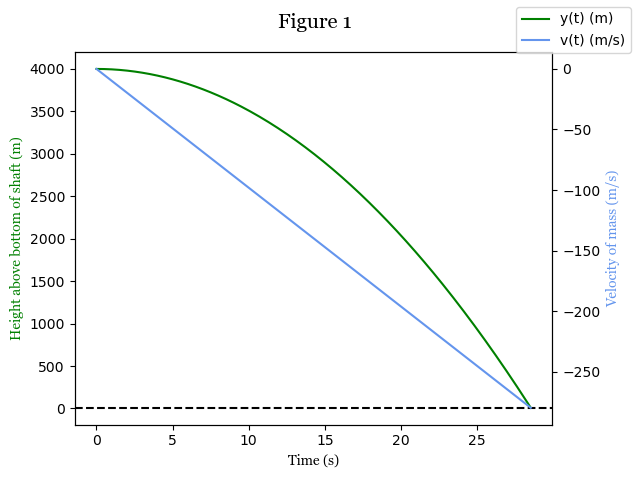

In [57]:
# Solving a system of differential equations 

# Define derivatives function 
def y_derivatives(t, s):
    y, v = s 
    dydt = v
    d2ydt2 = -g0 + alpha * (dydt**gamma)
    derivs = [dydt, d2ydt2]
    return derivs

# Defining time span 
t0 = 0 #seconds
tf = 100 #seconds
t_eval = np.linspace(t0, tf, 1000)

# Define initial conditions 
ics = [4*10**3, 0] #m, m/s -- the initial y coordinate and v 

# Define event 
def bottom(t,s):
    return s[0] - 0 
bottom.terminal = True 

# Solve ivp 
soln = solve_ivp(fun = y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t
y = soln.y[0]
v = soln.y[1]

t_bottom = soln.t_events[0]
print(f"It hits the bottom at t = {t_bottom} seconds")
print("\n")
print(soln)

fig, ax = plt.subplots()
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Georgia")
ax.set_ylabel("Height above bottom of shaft (m)", color = "green", fontname = "Georgia")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity of mass (m/s)", color = "cornflowerblue", fontname = "Georgia")

ax.axhline(0, color = "black", linestyle = "--")
fig.suptitle("Figure 1", fontname = "Georgia", fontsize = 15)
fig.legend()
fig.tight_layout()

Solving the system of differential equations numerically yielded the result that t = 28.55686246 seconds when the mass reaches the bottom of the shaft. 

When we solved analytically, we got that it would hit at t = 28.55686245854129 seconds. 

These results are consistent with one another -- the analytic solution has more significant figures, but the solutions are consistent to 10 significant figures.

## Part 2: Including Drag and a Variable g

In [58]:
def g(y):
    d_beneath_surface = 4000 - y
    r = R_earth - d_beneath_surface
    return g0*(r/R_earth)

It hits the bottom at t = [28.55836042] seconds


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 4.000e+03  4.000e+03 ...  3.631e+01  8.352e+00]
            [ 0.000e+00 -9.820e-01 ... -2.788e+02 -2.798e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 4.547e-13, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


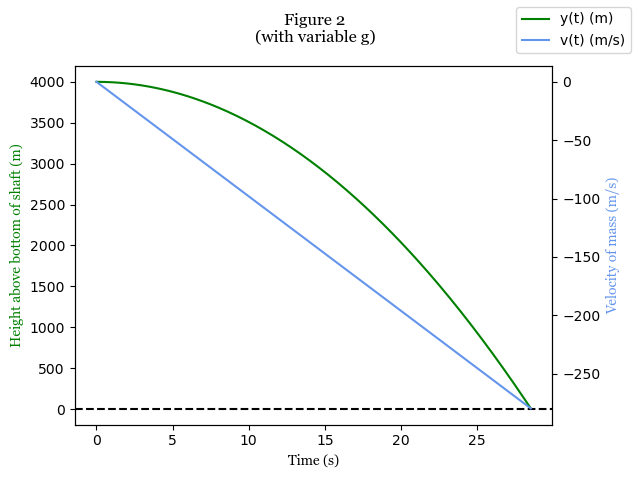

In [59]:
# Define derivatives function 
def new_y_derivatives(t, s):
    y, v = s 
    dydt = v
    d2ydt2 = -g(y) + alpha * (dydt)**gamma
    derivs = [dydt, d2ydt2]
    return derivs

# Using same time span, initial conditions, and event as previous part. 

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t
y = soln.y[0]
v = soln.y[1]

t_bottom = soln.t_events[0]
print(f"It hits the bottom at t = {t_bottom} seconds")
print("\n")
print(soln)

fig, ax = plt.subplots()
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Georgia")
ax.set_ylabel("Height above bottom of shaft (m)", color = "green", fontname = "Georgia")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity of mass (m/s)", color = "cornflowerblue", fontname = "Georgia")

ax.axhline(0, color = "black", linestyle = "--")

fig.legend()
fig.suptitle("Figure 2\n(with variable g)", fontname = "Georgia")
fig.tight_layout()

Incorporating a height-dependent g made the fall time longer -- now, the fall to the bottom of the shaft takes 28.55836042 seconds, rather than 28.55686246 seconds. This is because the acceleration will decrease as you get closer to the center of the earth, which means that, when closer to the center of the Earth, the velocity will increase at a slower rate. 

It hits the bottom at t = [84.27871109] seconds


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  8.408e+01  8.418e+01]
        y: [[ 4.000e+03  4.000e+03 ...  9.633e+00  4.678e+00]
            [ 0.000e+00 -9.819e-01 ... -4.946e+01 -4.946e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-1.705e-13, -4.946e+01]])]
     nfev: 128
     njev: 0
      nlu: 0


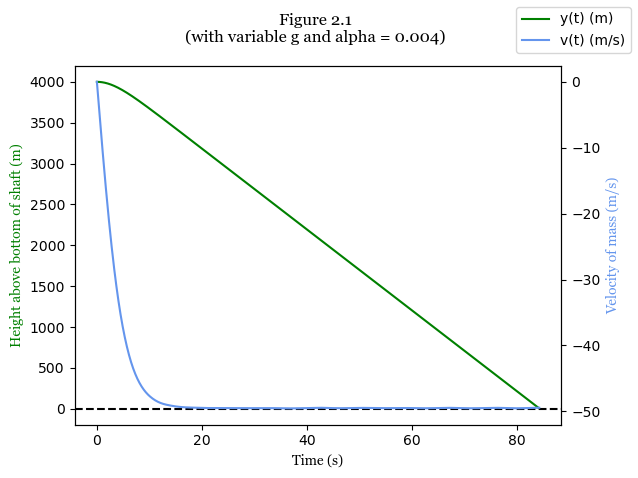

In [60]:
alpha = 0.004

# Using the same initial conditions, time span, event, and derivatives function as before. 
# But this time, we have a different alpha 

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = bottom)
t = soln.t
y = soln.y[0]
v = soln.y[1]

t_bottom = soln.t_events[0]
print(f"It hits the bottom at t = {t_bottom} seconds")
print("\n")
print(soln)

fig, ax = plt.subplots()
ax.plot(t, y, color = "green", label = "y(t) (m)")
ax.set_xlabel("Time (s)", fontname = "Georgia")
ax.set_ylabel("Height above bottom of shaft (m)", color = "green", fontname = "Georgia")

ax2 = ax.twinx()
ax2.plot(t, v, color = "cornflowerblue", label = "v(t) (m/s)")
ax2.set_ylabel("Velocity of mass (m/s)", color = "cornflowerblue", fontname = "Georgia")

ax.axhline(0, color = "black", linestyle = "--")

fig.legend()
fig.suptitle("Figure 2.1\n(with variable g and alpha = 0.004)", fontname = "Georgia")
fig.tight_layout()

When drag is taken into consideration, the mass hits a terminal velocity and therefore takes a lot longer to hit the bottom of the shaft. It takes t = 84.27871109 seconds to hit the bottom of the shaft, which is nearly triple the time it would take to hit the bottom without air resistance.

## Part 3: The Coriolis Force

In [61]:
def position_derivatives(t, s):
    m = 1 #kg (just putting this in here for now -- not sure how to do it without a test mass)
    r = s[0:3]
    v = s[3:6]

    x, y, z = r

    drdt = v
    
    vx, vy, vz = v[0:3]

    dvxdt = (alpha * vx**gamma) + (2*w_earth*vy)/m 
    dvydt = (-g(y) + alpha * vy**gamma) - (2*w_earth*vx)/m 
    dvzdt = (alpha * vz**gamma)

    dvdt = [dvxdt, dvydt, dvzdt]

    derivs = np.concatenate((drdt, dvdt))
    
    return derivs

DO I NEED THE DRAG ON THE X TERM HERE??

FIGURE OUT IF YOUR x COORDINATES ARE CORRECT

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  8.408e+01  8.418e+01]
        y: [[ 0.000e+00 -2.385e-07 ... -2.272e+01 -2.278e+01]
            [ 4.000e+03  4.000e+03 ...  9.620e+00  4.650e+00]
            ...
            [ 0.000e+00 -9.819e-01 ... -4.948e+01 -4.948e+01]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: [array([ 8.428e+01]), array([ 4.077e+01])]
 y_events: [array([[-2.283e+01,  2.842e-13,  0.000e+00, -5.479e-01,
                   -4.947e+01,  0.000e+00]]), array([[-5.000e+00,  2.155e+03,  0.000e+00, -2.649e-01,
                   -4.954e+01,  0.000e+00]])]
     nfev: 128
     njev: 0
      nlu: 0
t = 84.27783096321473 seconds when it hits the bottom
t = 40.76576546223271 seconds when it hits the side


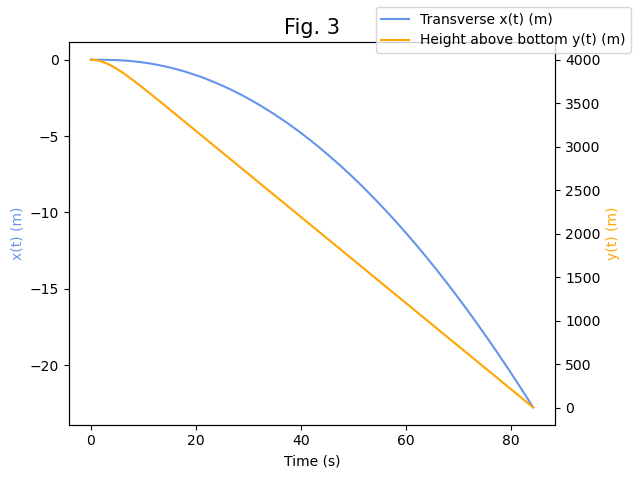

In [62]:
# Define time span 
t0 = 0 
tf = 100
t_eval = np.linspace(t0, tf, 1000)

# Define initial conditions
x0, y0, z0 = 0, 4000, 0
vx0, vy0, vz0 = 0, 0, 0

r0 = [x0, y0, z0]
v0 = [vx0, vy0, vz0]

ics = np.concatenate((r0, v0))

# Define event 
def bottom(t,s):
    return s[1] - 0 
bottom.terminal = True 

def side(t, s):
    return s[0] + 5 

# Solve ivp 
soln = solve_ivp(fun = position_derivatives, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [bottom, side])
t = soln.t

x = soln.y[0]
y = soln.y[1]
z = soln.y[2]

vx = soln.y[0]
vy = soln.y[1]
vz = soln.y[2]

r = [x, y, z]
v = [vx, vy, vz]

print(soln)

t_bottom = soln.t_events[0][0]
print(f"t = {t_bottom} seconds when it hits the bottom")

t_side = soln.t_events[1][0]
print(f"t = {t_side} seconds when it hits the side")

fig, ax = plt.subplots()
ax.plot(t, x, color = "cornflowerblue", label = "Transverse x(t) (m)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("x(t) (m)", color = "cornflowerblue")

ax2 = ax.twinx()
ax2.plot(t, y, color = "orange", label = "Height above bottom y(t) (m)")
ax2.set_ylabel("y(t) (m)", color = "orange")

ax.set_title("Fig. 3", fontsize = 15)
fig.legend()
fig.tight_layout()

t = 84.27783096321473 seconds when it hits the bottom
t = 40.76576546223271 seconds when it hits the side

The test mass hits the side of the shaft before it hits the bottom.

In [63]:
def position_derivatives_nodrag(t, s):
    alpha = 0 
    
    m = 1 #kg (just putting this in here for now -- not sure how to do it without a test mass)
    r = s[0:3]
    v = s[3:6]

    x, y, z = r

    drdt = v
    
    vx, vy, vz = v[0:3]

    dvxdt = (alpha * vx**gamma) + (2*w_earth*vy)/m 
    dvydt = (-g(y) + alpha * vy**gamma) - (2*w_earth*vx)/m 
    dvzdt = (alpha * vz**gamma)

    dvdt = [dvxdt, dvydt, dvzdt]

    derivs = np.concatenate((drdt, dvdt))
    
    return derivs

In [64]:
# Define initial conditions
x0, y0, z0 = 0, 4000, 0
vx0, vy0, vz0 = 0, 0, 0

r0 = [x0, y0, z0]
v0 = [vx0, vy0, vz0]

ics = np.concatenate((r0, v0))

# Define event 
def bottom(t,s):
    return s[1] - 0 
bottom.terminal = True 

def side(t, s):
    return s[0] + 5 

# Solve ivp 
soln = solve_ivp(fun = position_derivatives_nodrag, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [bottom, side])
t = soln.t

x = soln.y[0]
y = soln.y[1]
z = soln.y[2]

vx = soln.y[0]
vy = soln.y[1]
vz = soln.y[2]

r = [x, y, z]
v = [vx, vy, vz]

print(soln)

t_bottom = soln.t_events[0][0]
print(f"t = {t_bottom} seconds when it hits the bottom")

t_side = soln.t_events[1][0]
print(f"t = {t_side} seconds when it hits the side")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.001e-01 ...  2.843e+01  2.853e+01]
        y: [[ 0.000e+00 -2.385e-07 ... -5.463e+00 -5.521e+00]
            [ 4.000e+03  4.000e+03 ...  3.632e+01  8.356e+00]
            ...
            [ 0.000e+00 -9.820e-01 ... -2.788e+02 -2.798e+02]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: [array([ 2.856e+01]), array([ 2.760e+01])]
 y_events: [array([[-5.538e+00,  0.000e+00,  0.000e+00, -5.818e-01,
                   -2.801e+02,  0.000e+00]]), array([[-5.000e+00,  2.635e+02,  0.000e+00, -5.434e-01,
                   -2.707e+02,  0.000e+00]])]
     nfev: 44
     njev: 0
      nlu: 0
t = 28.558375952092817 seconds when it hits the bottom
t = 27.60175134719008 seconds when it hits the side


Without drag being taken into account, the mass still hits the side of the shaft before it hits the bottom, but these times are significantly closer to one another. 

## Part 4: An Infinitely Deep Mine

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e+01 ...  2.997e+04  3.000e+04]
        y: [[ 4.000e+03 -4.228e+02 ... -8.431e+05 -7.288e+05]
            [ 0.000e+00 -2.945e+02 ...  3.934e+03  3.675e+03]]
      sol: None
 t_events: [array([ 1.266e+03,  3.799e+03,  6.331e+03,  8.864e+03,
                   1.140e+04,  1.393e+04,  1.646e+04,  1.899e+04,
                   2.153e+04,  2.406e+04,  2.659e+04,  2.912e+04]), array([], dtype=float64)]
 y_events: [array([[-6.374e+06, -7.911e+03],
                  [-6.374e+06,  7.910e+03],
                  ...,
                  [-6.374e+06, -7.909e+03],
                  [-6.374e+06,  7.907e+03]]), array([], dtype=float64)]
     nfev: 362
     njev: 0
      nlu: 0


The mass will reach the center of the earth at t = 1266.4632397951457 seconds at a velocity of v = -7910.501483064156 m/s
Diameter of earth: 1.2756e+07
Max depth: 1.2758e+07


<bound method Figure.tight_layout of <Figure size 640x480 with 2 Axes>>

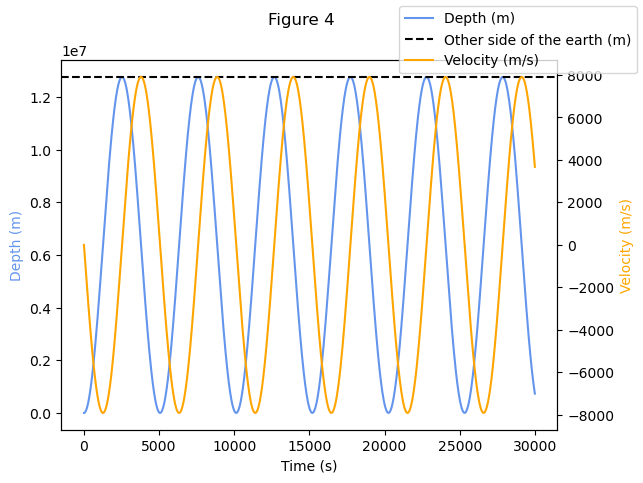

In [99]:
# Want to plot depth so we'll need to plot 4,000-y

def new_y_derivatives_nodrag(t, s):
    alpha = 0
    y, v = s 
    dydt = v
    d2ydt2 = -g(y) + alpha * (dydt)**gamma
    derivs = [dydt, d2ydt2]
    return derivs


# Define time span 
t0 = 0 
tf = 30000
t_eval = np.linspace(t0, tf, 1000)

# Define initial conditions 
y0 = 4000 #m -- still using our same definition of y as before 
v0 = 0 #m/s
ics = [y0, v0]

# Define event 
def center(t, s):
    return (4000 - s[0]) - R_earth

def otherside(t, s):
    return (4000 - s[0]) - (D_earth)

# Solve ivp 
soln = solve_ivp(fun = new_y_derivatives_nodrag, t_span = (t0, tf), y0 = ics, t_eval = t_eval, events = [center, otherside])
t = soln.t
y = soln.y[0]
depth = 4000 - y # Creating another variable for us to plot the depth 
v = soln.y[1]

t_center = soln.t_events[0][0]
#t_otherside = soln.t_events[1][0]

v_center = soln.y_events[0][0][1]
#v_otherside = soln.y_events[1][0][1]

print(soln)
print("\n")
print(f"The mass will reach the center of the earth at t = {t_center} seconds at a velocity of v = {v_center} m/s")

print(f"Diameter of earth: {2*R_earth:10.4e}")
print(f"Max depth: {np.max(depth):10.4e}")
D_earth < np.max(depth)  

fig, ax = plt.subplots()
ax.plot(t, depth, color = "cornflowerblue", label = "Depth (m)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Depth (m)", color = "cornflowerblue")
ax.axhline(D_earth, color = "black", linestyle = "--", label = "Other side of the earth (m)")

ax2 = ax.twinx()
ax2.plot(t, v, color = "orange", label = "Velocity (m/s)")
ax2.set_ylabel("Velocity (m/s)", color = "orange")


fig.suptitle("Figure 4")
fig.legend()
fig.tight_layout

The mass will oscillate between the two poles of the earth in simple harmonic motion!

In [100]:
# Trying to figure out what's going on
for i in range(len(depth)):
    if depth[i] >= D_earth:
        print(f"depth: {depth[i]:10.4e}")
        print(f"t = {t[i]}")
        print(f"depth - D_earth: {depth[i] - D_earth}")
        print(f"Tunnel output: {tunnel(t[i], [y[i], v[i]])}")
        print("\n")

depth: 1.2758e+07
t = 2522.5225225225226
depth - D_earth: 1850.4705122392625
Tunnel output: 1850.4705122392625


depth: 1.2757e+07
t = 2552.5525525525527
depth - D_earth: 525.0771519076079
Tunnel output: 525.0771519076079


depth: 1.2758e+07
t = 7597.597597597598
depth - D_earth: 1688.2646489553154
Tunnel output: 1688.2646489553154


depth: 1.2757e+07
t = 12672.672672672672
depth - D_earth: 725.6787197832018
Tunnel output: 725.6787197832018


depth: 1.2756e+07
t = 17717.71771771772
depth - D_earth: 161.2758510503918
Tunnel output: 161.2758510503918


depth: 1.2757e+07
t = 22792.792792792792
depth - D_earth: 345.3927079215646
Tunnel output: 345.3927079215646




FIGURE OUT WHY IT'S NOT GIVING ME THE EVENT 

Still to do: 
- How long will it take to reach the other side
- At what time does the object reach the **center** of the Earth, and at what speed
- How does the "crossing time" compare to the orbital period

## Part 5: A Non-Uniform Earth

In [101]:
def density(r)
    

SyntaxError: incomplete input (3420448443.py, line 2)

## Part 6: A Lunar Mine Shaft